## Importy

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

## Dane

### Pobranie danych

In [3]:
DATA_FOLDER = os.path.join(os.getcwd(), 'dane')
datasets = {}

### Inflacja

In [4]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Inflacja.csv'))
print(data.head())
inflation_dict = {data['rok'][i]: data['wartosc'][i] for i in range(len(data))}
inflation_dict

    rok  wartosc
0  1999    107.3
1  2000    110.1
2  2001    105.5
3  2002    101.9
4  2003    100.8


{1999: 107.3,
 2000: 110.1,
 2001: 105.5,
 2002: 101.9,
 2003: 100.8,
 2004: 103.5,
 2005: 102.1,
 2006: 101.0,
 2007: 102.5,
 2008: 104.2,
 2009: 103.5,
 2010: 102.6,
 2011: 104.3,
 2012: 103.7,
 2013: 100.9,
 2014: 100.0,
 2015: 99.1,
 2016: 99.4,
 2017: 102.0,
 2018: 101.6,
 2019: 102.3,
 2020: 103.4,
 2021: 105.1,
 2022: 114.4,
 2023: 111.4}

### Nakłady na B / R w przeliczeniu na mieszkańca

In [5]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Nakłady_BR_na_mieszkanca.csv'), sep=';')
IMPORTANT_COLUMNS = ['opis_okres', 'wartosc']
data = data[IMPORTANT_COLUMNS]
data.rename(columns={'opis_okres': 'rok'}, inplace=True)
datasets['Nakłady_BR_na_mieszkanca'] = data
data.head()

,rok,wartosc
0,1999,119
1,2000,125
2,2001,127
3,2002,118
4,2003,119


### Nakłady na B / R według sektorów wykonawczych (ceny bieżące)

In [8]:
data = pd.read_csv(os.path.join(DATA_FOLDER, 'Nakłady_BR_sektory.csv'), sep=',')
datasets['Nakłady_BR_sektory'] = data
data.head()

,rok,sektor,wartosc
0,2022,przedsiębiorstwa,29455.1
1,2022,rządowy,863.7
2,2022,szkolnictwo wyższe,14296.8
3,2022,prywatne instytucje niekomercyjne,86.8
4,2021,przedsiębiorstwa,23769.1


# Wizualizacja

### Nakłady na B / R w przeliczeniu na jednego mieszkańca na przestrzeni lat

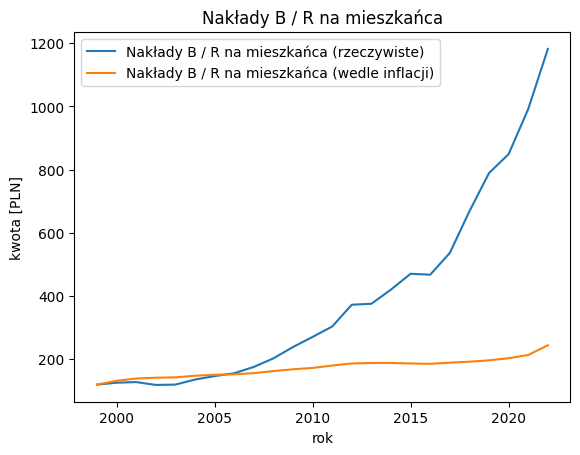

In [17]:
data = datasets["Nakłady_BR_na_mieszkanca"]

year_value_dict = {
    year: value for year, value in zip(data['rok'], data['wartosc'])
}
earliest_price = year_value_dict[min(year_value_dict.keys())]
for year, value in sorted(year_value_dict.items())[1:]:
    earliest_price = round(earliest_price * (inflation_dict[year] / 100), 2)
    year_value_dict[year] = earliest_price

    
plt.plot(data['rok'], data['wartosc'], label=f'Nakłady B / R na mieszkańca (rzeczywiste)')
plt.plot(list(year_value_dict.keys()), list(year_value_dict.values()), label=f'Nakłady B / R na mieszkańca (wedle inflacji)')
plt.xlabel('rok')
plt.ylabel('kwota [PLN]')
plt.title(f'Nakłady B / R na mieszkańca')
plt.legend()

plt.show()

### Nakłady na B / R według sektorów wykonawczych (ceny bieżące)

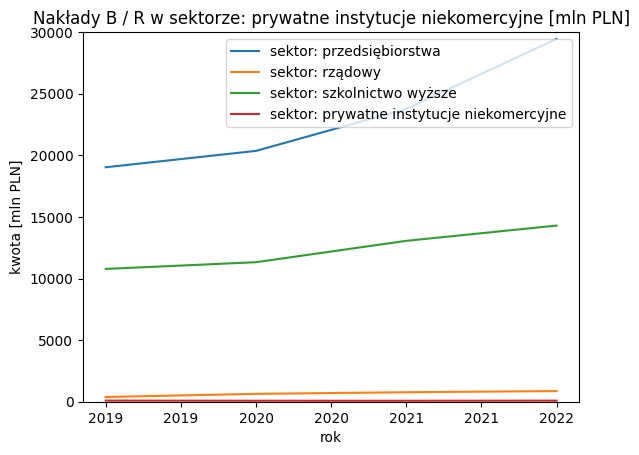

In [19]:
unique_sectors = datasets["Nakłady_BR_sektory"]['sektor'].unique()
data = datasets["Nakłady_BR_sektory"]

for sector in unique_sectors:
    sector_data = data[data['sektor'] == sector]
    plt.plot(sector_data['rok'], sector_data['wartosc'], label=f'sektor: {sector}')
    plt.ylim(0, 30000)  # Setting y-axis range
    plt.xlabel('rok')
    plt.ylabel('kwota [mln PLN]')
plt.title(f'Nakłady B / R w sektorze: {sector} [mln PLN]')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.legend()
plt.show()

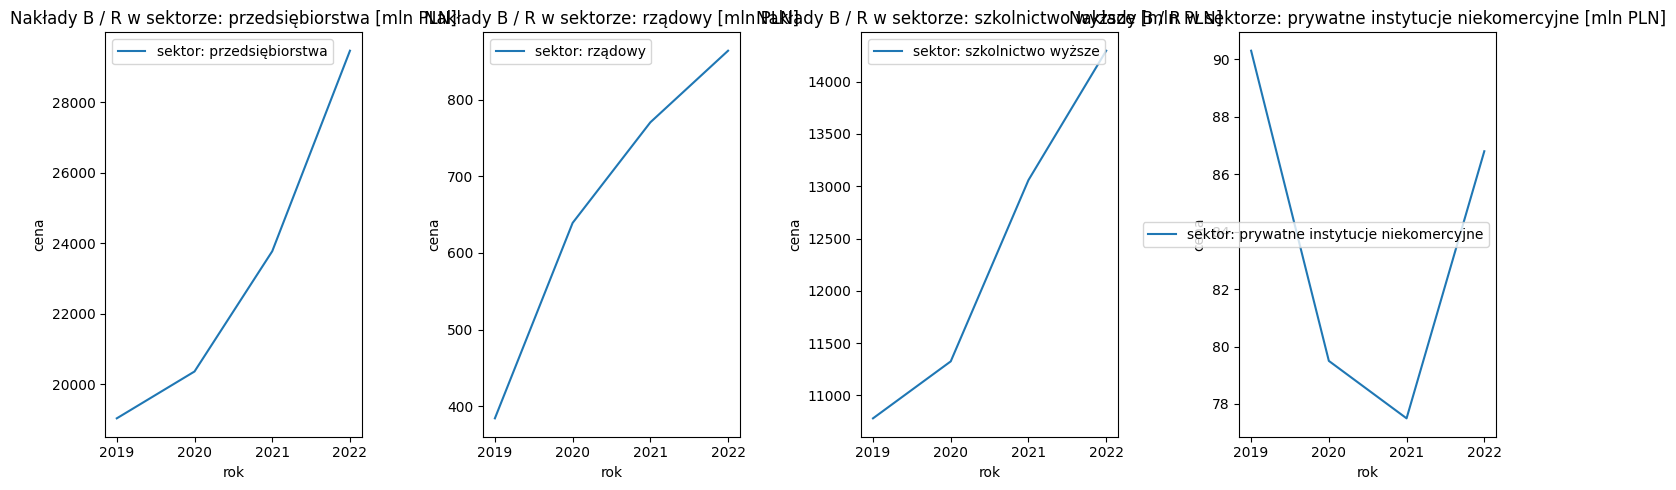

In [21]:
unique_sectors = datasets["Nakłady_BR_sektory"]['sektor'].unique()
data = datasets["Nakłady_BR_sektory"]

fig, axs = plt.subplots(1, 4, figsize=(15, 5))  # 1 row, 3 columns

for i, sector in enumerate(unique_sectors, 0):
    sector_data = data[data['sektor'] == sector]
    axs[i].plot(sector_data['rok'], sector_data['wartosc'], label=f'sektor: {sector}')
    axs[i].set_xlabel('rok')
    axs[i].set_ylabel('cena')
    axs[i].set_title(f'B / R w sektorze: {sector} [mln PLN]')
    axs[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    axs[i].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()